# AutoEncoder

- 입력 데이터를 출력 층에서 그대로 복원하는 윽닉층의 신경망의 파라미터를 계산하는 것
- 평가함수 : 오차 (출력층 - 입력층)

- 구성 : 입력 - 인코더 - 은닉층 - 디코더 - 출력

- 인코더 : 입력층에서 특성을 추출하는 기능
- 디코더 : 추출한 특성을 이용해서 원래의 데이터를 복원하는 기능
- 은닉층 : 입력데이터를 복원하기 위한 특성 파라미터 계산 기능

- 비지도 학습에 속함 - 라벨 데이터가 필요 없음


# (1) Uncomplete AE : 입력층보다 은닉층의 크기가 작은 AE

- 손글씨 데이터를 이용한 손글씨 복원

In [46]:
from tensorflow.keras.datasets import mnist


# 데이터를 가져올 때 특성 데이터만 가져옴
(X_train, _), (X_test, _) = mnist.load_data()

In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# 정규화 (0-255 -> 0.01.0)
# Dense층만 사용하므로 2차원 데이터를 1차원으로 변환
X_train =X_train.reshape(60000, 28*28)
X_test =X_test.reshape(10000, 28*28)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
# 오토인코더 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# Uncomplete AE에서는 퍼셉트론의 수를 32개로 설정
model1.add(Dense(32, input_dim=784, activation="relu"))

#출력층의 수는 입력층의 수와 동일하게 서정
model1.add(Dense(784, activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(loss="binary_crossentropy",
               optimizer='adam')

In [10]:
h1 = model1.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 0.2783 - val_loss: 0.1891
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1696 - val_loss: 0.1523
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1437 - val_loss: 0.1335
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1284 - val_loss: 0.1212
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1180 - val_loss: 0.1128
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1108 - val_loss: 0.1066
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1057 - val_loss: 0.1023
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1019 - val_loss: 0.0991
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0993 - val_loss: 0.0969
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0974 - val_loss: 0.09

In [11]:
# 예측
decode1 = model1.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [12]:
decode1.mean()

0.13413443

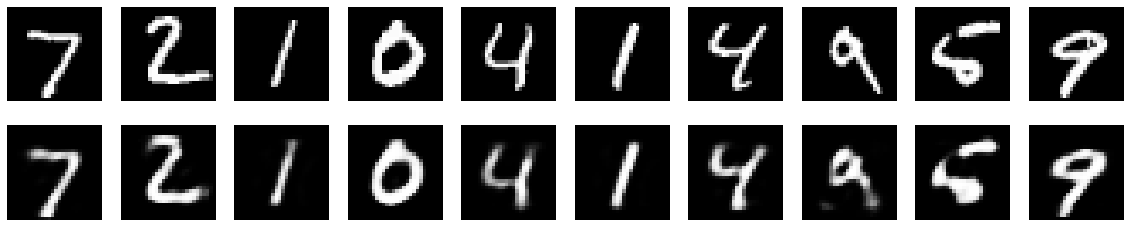

In [15]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode1[i].reshape(28,28), cmap="gray")
  plt.axis("off")

# (2) Spare AE
  - 입력층에 L1이나 L2를 추가해서 과적합 부분을 줄여준 것

In [17]:
from tensorflow.keras import regularizers

model2 = Sequential()

# 인코더
# L1 규제를 추가
model2.add(Dense(32, input_dim=784, activation='relu',
                   activity_regularizer=regularizers.l1(10e-7)))

# 디코더
model2.add(Dense(784, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(loss='binary_crossentropy',
               optimizer="adam")

In [21]:
h2 = model2.fit(X_train, X_train, epochs=50, batch_size33=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2777 - val_loss: 0.1918
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1726 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1436 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1275 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1173 - val_loss: 0.1118
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1102 - val_loss: 0.1061
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1053 - val_loss: 0.1020
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1017 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0976 - val_loss: 0.095

In [22]:
decode2 = model2.predict(X_test)

313/313 [==============================] - 0s 862us/step


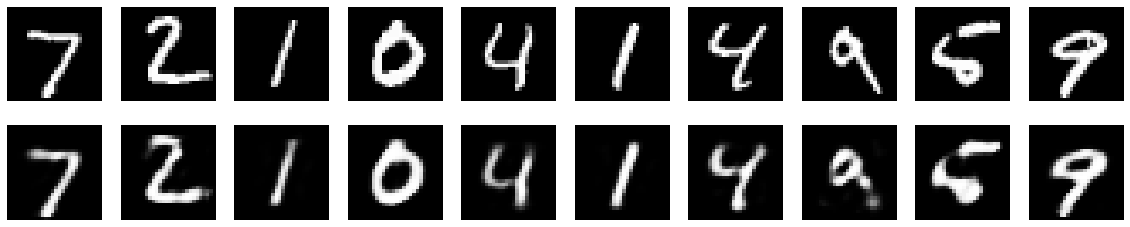

In [24]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode2[i].reshape(28,28), cmap="gray")
  plt.axis("off")

# (3) Stacked AE (Deep Fully-connected AE)

- 은닉층을 더 많이 쌓은 것
- 인코더와 디코더는 대칭되도록 퍼셉트론 수를 맞추어야 함

In [26]:
model3 = Sequential()

# 인코더
model3.add(Dense(128, input_dim=784, activation='relu'))

# 은닉층(인코더 쪽) - 은닉층의 퍼셉트론 수를 줄여감
model3.add(Dense(64))
model3.add(Dense(32))

# 인코더와 디코더가 대칭이 되도록 설계해야 한다.

# 은닉층(디코더 쪽) - 은닉층의 퍼셉트론 수를 늘려감
model3.add(Dense(64))
model3.add(Dense(128))

#디코더
model3.add(Dense(784, activation='sigmoid'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [28]:
model3.compile(loss='binary_crossentropy',
               optimizer="adam")

In [30]:
h3 = model3.fit(X_train, X_train, epochs=30, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/30
235/235 [==============================] - 4s 14ms/step - loss: 0.2073 - val_loss: 0.1392
Epoch 2/30
235/235 [==============================] - 3s 15ms/step - loss: 0.1278 - val_loss: 0.1174
Epoch 3/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1146 - val_loss: 0.1098
Epoch 4/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1078 - val_loss: 0.1032
Epoch 5/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1028 - val_loss: 0.0995
Epoch 6/30
235/235 [==============================] - 3s 14ms/step - loss: 0.0995 - val_loss: 0.0967
Epoch 7/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0968 - val_loss: 0.0944
Epoch 8/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0948 - val_loss: 0.0926
Epoch 9/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0933 - val_loss: 0.0916
Epoch 10/30
235/235 [==============================] - 3s 12ms/step - loss: 0.0920 - val_lo

In [31]:
decode3 = model3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


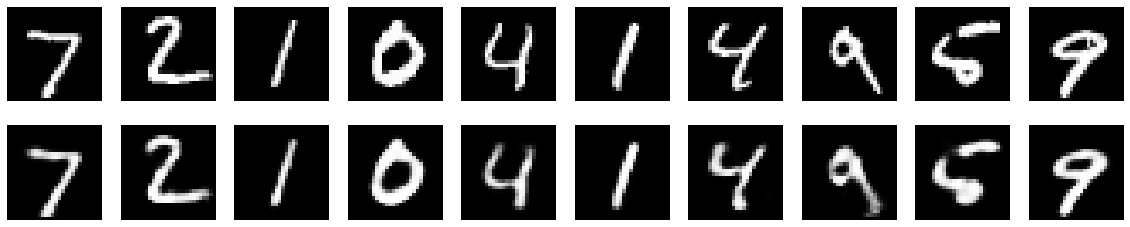

In [32]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode3[i].reshape(28,28), cmap="gray")
  plt.axis("off")

# (4) Deep Convolution AE
  - CNN을 이용하여 AE를 구성한 것
  - 인코더 : Conv2D, MaxPooling2D로 구성
  - 디코더 : Conv2D, UpSampling2D로 구성

In [67]:
# 색상차원 추가
from tensorflow.keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype("float32") / 255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

model4 = Sequential()

# 인코더
model4.add(Conv2D(16, (3,3), padding="same", input_shape=(28, 28, 1), activation='relu'))
model4.add(MaxPooling2D((2,2)))
model4.add(Conv2D(8, (3,3), padding="same",activation='relu'))
model4.add(MaxPooling2D((2,2)))

# 디코더
model4.add(Conv2D(8, (3,3), padding='same', activation='relu'))
model4.add(UpSampling2D((2,2)))
model4.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model4.add(UpSampling2D((2,2)))

model4.add(Conv2D(1,(3,3), padding='same', activation='sigmoid')) # 흑백이미지 1장이 들어가기 때문에 1

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0

In [5]:
model4.compile(loss='binary_crossentropy',
               optimizer="adam")

In [6]:
h4 = model4.fit(X_train, X_train, epochs=30, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/30
235/235 [==============================] - 11s 10ms/step - loss: 0.2220 - val_loss: 0.1072
Epoch 2/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0972 - val_loss: 0.0899
Epoch 3/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0879 - val_loss: 0.0845
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0839 - val_loss: 0.0815
Epoch 5/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0814 - val_loss: 0.0795
Epoch 6/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0796 - val_loss: 0.0781
Epoch 7/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0782 - val_loss: 0.0768
Epoch 8/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0772 - val_loss: 0.0760
Epoch 9/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0765 - val_loss: 0.0754
Epoch 10/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0758 - val_loss: 0.07

In [7]:
decode4 = model4.predict(X_test)

313/313 [==============================] - 1s 2ms/step


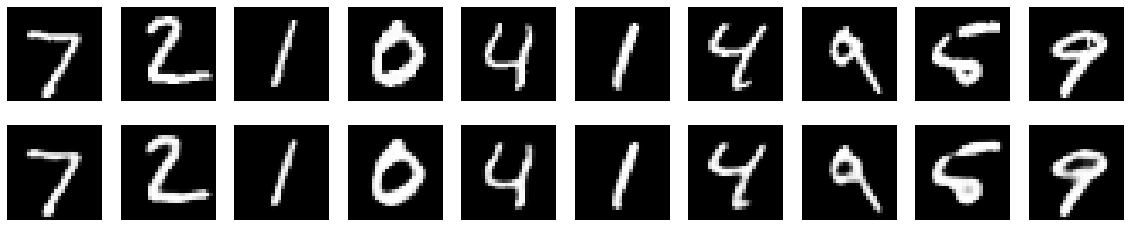

In [9]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode4[i].reshape(28,28), cmap="gray")
  plt.axis("off")

# 글자 말고 다른 거

In [24]:
# 색상차원 추가
from tensorflow.keras.datasets import fashion_mnist
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype("float32") / 255

X_train.shape, X_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

model5 = Sequential()

# 인코더
model5.add(Conv2D(16, (3,3), padding="same", input_shape=(28, 28, 1), activation='relu'))
model5.add(MaxPooling2D((2,2)))
model5.add(Conv2D(8, (3,3), padding="same",activation='relu'))
model5.add(MaxPooling2D((2,2)))

# 디코더
model5.add(Conv2D(8, (3,3), padding='same', activation='relu'))
model5.add(UpSampling2D((2,2)))
model5.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model5.add(UpSampling2D((2,2)))

model5.add(Conv2D(1,(3,3), padding='same', activation='sigmoid')) # 흑백이미지 1장이 들어가기 때문에 1

model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 14, 8)       

In [26]:
model5.compile(loss='binary_crossentropy',
               optimizer="adam")

In [30]:
h5 = model5.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2636 - val_loss: 0.2656
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2635 - val_loss: 0.2656
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2633 - val_loss: 0.2656
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2632 - val_loss: 0.2652
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2631 - val_loss: 0.2652
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2630 - val_loss: 0.2652
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2628 - val_loss: 0.2650
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2627 - val_loss: 0.2649
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2626 - val_loss: 0.2648
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2625 - val_lo

In [31]:
decode5 = model5.predict(X_test)

313/313 [==============================] - 1s 2ms/step


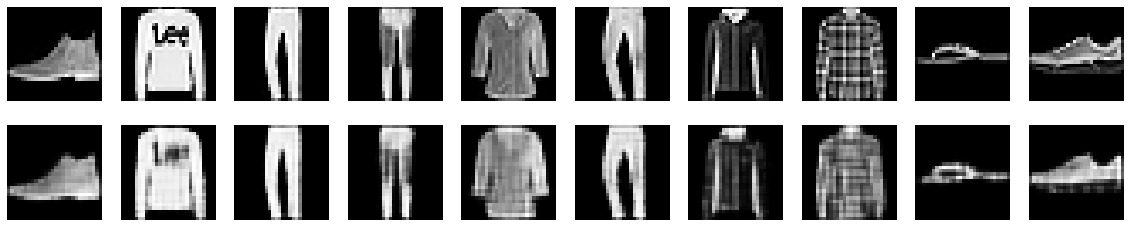

In [32]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode5[i].reshape(28,28), cmap="gray")
  plt.axis("off")

# (5) Denosing AE
- 잡음을 제거할 목적으로 사용하는 AE
- 잡읍 : 가우시안 잡음을 임의로 만들어서 사용|

In [68]:
import numpy as np

# 원래 이미지에 잡음 추가
nosie_factor = 0.5

# normal(이산평균, 이산표준편차, 데이터수) : 정규분포의 숫자를 발생
X_train_noise = X_train + nosie_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + nosie_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# 범위를 벗어난 값들을 범위 안의 값으로 변환
X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0)

X_train_noise.shape, X_test_noise.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

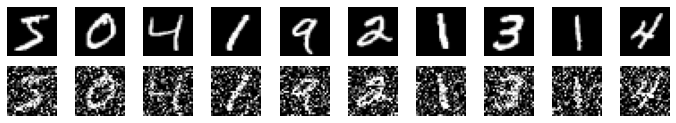

In [58]:
# 추가된 잡음 이미지 확인
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(12,2))

for i in range(n):
  plt.subplot(2, n, i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  plt.subplot(2, n, i+1+n)
  plt.imshow(X_train_noise[i].reshape(28,28), cmap="gray")
  plt.axis("off")

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

model6 = Sequential()

# 인코더
model6.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Conv2D(filters=32, kernel_size=(3,3) ,activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2,2)))

# 디코더
model6.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model6.add(UpSampling2D((2,2)))
model6.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model6.add(UpSampling2D((2,2)))

model6.add(Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid')) # 흑백이미지 1장이 들어가기 때문에 1

model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 14, 14, 32)      

In [70]:
model6.compile(loss='binary_crossentropy',
               optimizer="adam")

In [71]:
h6 = model6.fit(X_train_noise, X_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(X_test_noise, X_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2179 - val_loss: 0.1312
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1238 - val_loss: 0.1172
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1159 - val_loss: 0.1120
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1117 - val_loss: 0.1086
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1089 - val_loss: 0.1067
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1070 - val_loss: 0.1049
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1045 - val_loss: 0.1030
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1036 - val_loss: 0.1020
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1028 - val_lo

In [72]:
decode6 = model6.predict(X_test)

313/313 [==============================] - 1s 2ms/step


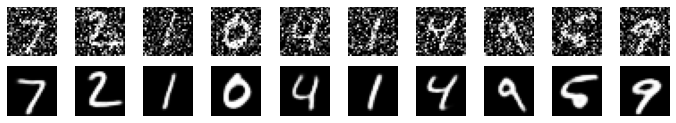

In [74]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(12,2))

for i in range(n):
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test_noise[i].reshape(28,28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode6[i].reshape(28,28), cmap="gray")
  plt.axis("off")

# https://github.com/xinntao/Real-ESRGAN 화질보정 GAN